<a href="https://colab.research.google.com/github/TetianaPavliuk/Portfolio_project_1/blob/main/Portfolio_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install --upgrade google-cloud-bigquery

In [81]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

In [82]:
auth.authenticate_user()

In [83]:
client = bigquery.Client(project="data-analytics-mate")

In [84]:
query = """
with session as (
    SELECT
        s.date AS order_date,
        s.ga_session_id,
        sp.continent,
        sp.country,
        sp.device,
        sp.browser,
        sp.mobile_model_name,
        sp.operating_system,
        sp.language,
        sp.medium,
        sp.channel
    from `DA.session` s
    left join `DA.session_params` sp
        ON s.ga_session_id = sp.ga_session_id
),
accounts as (
    select
        acs.ga_session_id,
        a.id AS registered_user_id,
        a.is_verified,
        a.is_unsubscribed
    from `DA.account_session` acs
    left join `DA.account` a
        on acs.account_id = a.id
),
orders  as (
    select
        o.ga_session_id,
        p.category,
        p.name AS product_name,
        p.price,
        p.short_description
    from `DA.order` o
    left join `DA.product` p
        ON o.item_id = p.item_id
)
select
    s.order_date,
    s.ga_session_id,
    s.continent,
    s.country,
    s.device,
    s.browser,
    s.mobile_model_name,
    s.operating_system,
    s.language,
    s.medium,
    s.channel,
    a.registered_user_id,
    a.is_verified,
    a.is_unsubscribed,
    o.category,
    o.product_name,
    o.price,
    o.short_description
from session s
left join accounts a
    on s.ga_session_id = a.ga_session_id
left join orders o
    on s.ga_session_id = o.ga_session_id
"""


In [85]:
query_job = client.query(query)
results = query_job.result()

In [86]:
df = results.to_dataframe()

In [87]:
df.head()

,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel,registered_user_id,is_verified,is_unsubscribed,category,product_name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(none),Direct,<NA>,<NA>,<NA>,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(none),Direct,<NA>,<NA>,<NA>,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


In [88]:
df.shape

(349545, 18)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_date          349545 non-null  dbdate 
 1   ga_session_id       349545 non-null  Int64  
 2   continent           349545 non-null  object 
 3   country             349545 non-null  object 
 4   device              349545 non-null  object 
 5   browser             349545 non-null  object 
 6   mobile_model_name   349545 non-null  object 
 7   operating_system    349545 non-null  object 
 8   language            235279 non-null  object 
 9   medium              349545 non-null  object 
 10  channel             349545 non-null  object 
 11  registered_user_id  27945 non-null   Int64  
 12  is_verified         27945 non-null   Int64  
 13  is_unsubscribed     27945 non-null   Int64  
 14  category            33538 non-null   object 
 15  product_name        33538 non-null

## Опис отриманого DataFrame:
Датасет складається із 18 колонок та 349545 сток, а саме:


*   order_date - дата сесії візити користувача/ дата замовлення ( тип даних - dbdate,  це тип даних, що використовується в контексті баз даних);
*   ga_session_id - унікальний ідентифікатор сесії візиту користувача (тип даних - ціле число);
*   continent - назва континенту де знаходиться користувач (тип даних - категоріальний, предствлений типом object  у  Pandas);
*   country - країна (тип даних - категоріальний);
*   device - тип пристрою, з якого користувач заходить на сайт (тип даних - категоріальний);
*   browser - назва браузера, який використовує користувач (тип даних - категоріальний);
*   mobile_model_name - назва моделі мобільного телефону, якщо користувач використовує мобільний пристрій (тип даних - категоріальний);
*   operating_system - назва операційної системи, яку використовує користувач (тип даних - категоріальний);
*   language - мова, яку використовує користувач в браузері (тип даних - категоріальний);
*   medium - середовище, з якого користувач перейшов на сайт;
*   channel - Канал, через який користувач потрапив на сайт (тип даних - категоріальний);
*   registered_user_id - унікальний числовий ідентифікатор кожного зареєстрованого користувача (тип даних - ціле число);
*   is_verified - бінарне значення, яке вказує, чи підтверджений обліковий запис користувача (тип даних - ціле число);
*   is_unsubscribed - бінарне значення, яке вказує, чи відписався користувач від розсилки (тип даних - ціле число);
*   category - категорія товару (тип даних - категоріальний, предствлений типом object  у  Pandas);
*   product_name - назва товару (тип даних - категоріальний, предствлений типом object  у  Pandas);
*   price - ціна товару (тип даних -  число з плаваючою комою);
*   shot_description - короткий текстовий опис товару (тип даних - категоріальний);






















У наборі даних присутні 5 колонок, що містять числові дані, до них відносяться: ідентифікатори користувачів, позначки верифікації та відписки, а також ціни товарів.
Категоріальні дані представлені у 12 колонках, що містять текстову інформацію. Ці колонки описують континенти, країни, пристрої, браузери, моделі телефонів, операційні системи, мови, середовища, канали, категорії товарів, назви товарів та їх короткі описи.
Також, в наборі даних є одна колонка, яка містить інформацію про дату замовлення.

In [90]:
unique_number_sessions = df['ga_session_id'].nunique()
print(f"Unique number of sessions: {unique_number_sessions}")

Unique number of sessions: 349545


In [91]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce') #перетворення на форомат дати

In [92]:
min_date = df['order_date'].min()
max_date = df['order_date'].max()

print(f"Period of time considered: from  {min_date} to {max_date}.")

Period of time considered: from  2020-11-01 00:00:00 to 2021-01-31 00:00:00.


In [93]:
print(df.isna().sum())

order_date                 0
ga_session_id              0
continent                  0
country                    0
device                     0
browser                    0
mobile_model_name          0
operating_system           0
language              114266
medium                     0
channel                    0
registered_user_id    321600
is_verified           321600
is_unsubscribed       321600
category              316007
product_name          316007
price                 316007
short_description     316007
dtype: int64


Пропущені значення DataFrame:

1.   Колонка "lanquage"
Ймовірні причин: дані не були зібрані, користувачі використовували браузер без передачі мови, не стандартні мовні налаштування,  використання VPN.
2. Колонка  "registered_user_id"
Ймовірні причини: велика частка незареєстрованих користувачі, відсутність обов'язкової реєстраіції, користувач здіснив реєстрацію під час наступних сеансів.
3.   Пропуски у  колонках "registered_user_id", "is_verified"  та  "is_unsubscribed" є взаємопов'язаними і мають однакове значення, якщо відсутня реєстрація, тобто користувач не створив свій акаунт, він і не підтверджував верифікацію, і не здійснював підписку.
4.  Так само і пропуски у колонках "category", "product_name", "price" та  "short_description" є пов'язані між зобою, якщо є сесії без покупок, відповідно ці поля будуть порожні.




In [94]:
df.duplicated().sum() # перевірка на дублікати

np.int64(0)

##Відповіді на питання:

In [95]:
# топ 3 континента за кількістю продажів
orders_by_continent = df.groupby('continent')['product_name'].count().sort_values(ascending=False).head(3)
print(f"Top 3 continents by sales: {orders_by_continent}")

Top 3 continents by sales: continent
Americas    18553
Asia         7950
Europe       6261
Name: product_name, dtype: int64


In [96]:
# топ 3 континента за сумою продажів
order_sum_continent = (df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3))
print(order_sum_continent)

continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64


In [97]:
# топ 5 країн за кількістю продажів
orders_by_country = df.groupby('country')['product_name'].count().sort_values(ascending=False).head(5)
print(f"Top 5 country by sales: {orders_by_country}")

Top 5 country by sales: country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
Name: product_name, dtype: int64


In [98]:
# топ 5 країн за суиою продажів
order_sum_country = (df.groupby('country')['price'].sum().sort_values(ascending=False).head(5))
print(order_sum_country)

country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64


In [99]:
# топ 10  категорії за сумою продажів
top_categories = (df.groupby('category')['price'].sum().sort_values(ascending=False).head(10))
print(top_categories)

category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


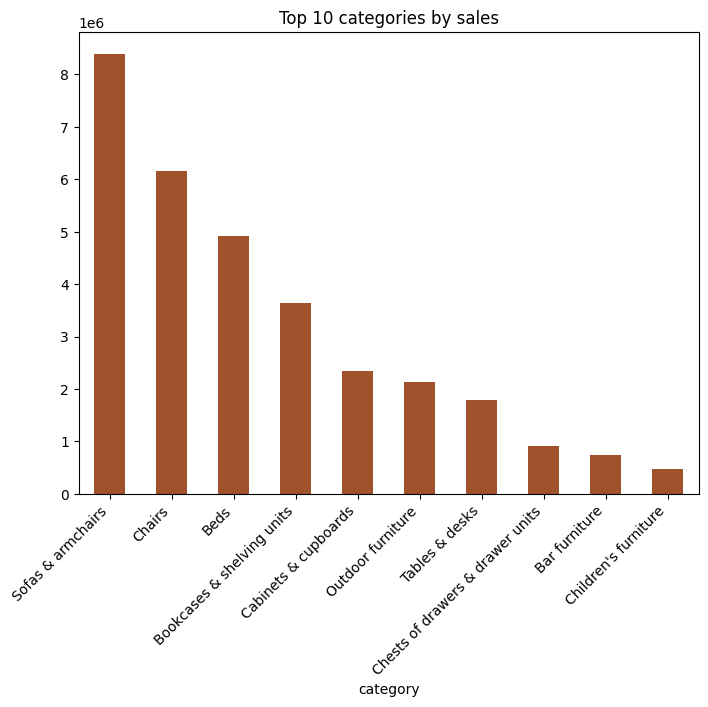

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

top_categories.plot(kind='bar', figsize=(8,6), color = "sienna")
plt.title('Top 10 categories by sales')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [101]:
# топ-10 категорій товарів у країні з найбільшими продажами
top_country = df.groupby('country')['price'].sum().idxmax()
df_top_country = df[df['country'] == top_country]
top_categories_in_top_country = (df_top_country.groupby('category')['price'].sum().sort_values(ascending=False).head(10))
print(f"Country with the highest sales: {top_country}")
print("\nTop 10 category in this country:")
print(top_categories_in_top_country)

Country with the highest sales: United States

Top 10 category in this country:
category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


Отже, ідентичність топ-10 категорій у загальному рейтингу та в країні з найбільшими продажами (United States) є очікуваним і логічним результатом, який підтверджує глобальну універсальність споживчих потреб, стабільність ринку меблів та ефективність глобальних маркетингових стратегій.

In [102]:
# групуємо за типом девайса та моделлю, підсумовуємо продажі
device_sales = df.groupby(['device', 'mobile_model_name'])['price'].sum()
total_sales = device_sales.sum()
device_sales_per= (device_sales / total_sales) * 100
device_sales_per = device_sales_per.sort_values(ascending=False)
print(device_sales_per.head(20))

device   mobile_model_name
desktop  Chrome               27.835602
         Safari               20.300643
mobile   iPhone               20.082667
         <Other>              17.937951
desktop  ChromeBook            5.725241
         Edge                  2.179667
         <Other>               1.644093
tablet   iPad                  1.403910
desktop  Firefox               1.316998
tablet   <Other>               0.858922
mobile   Pixel 4 XL            0.369976
         Pixel 3               0.341390
         Safari                0.001861
         Edge                  0.001079
Name: price, dtype: float64


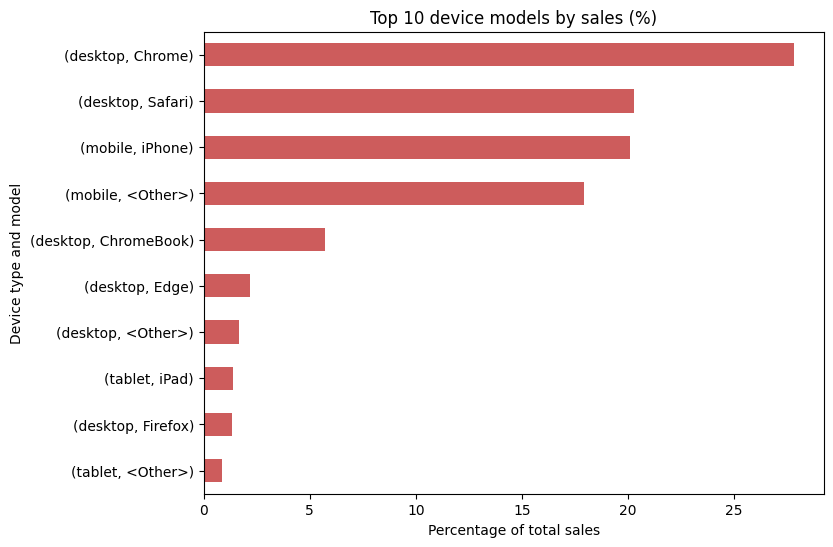

In [103]:
device_sales_per.head(10).plot(kind='barh', figsize=(8, 6), color="indianred")

plt.xlabel("Percentage of total sales")
plt.ylabel("Device type and model")
plt.title("Top 10 device models by sales (%)")
plt.gca().invert_yaxis()
plt.show()

In [104]:
# групуємо за джерелами трафіку, підсумовуємо продажі
traffic_sales  = df.groupby('medium')['price'].sum()
sales_total = traffic_sales.sum()
traffic_sales_per= (traffic_sales / sales_total) * 100
traffic_sales_per = traffic_sales_per.sort_values(ascending=False)
print(traffic_sales_per)

medium
organic           34.202840
(none)            23.442345
referral          17.646386
<Other>           14.047882
(data deleted)     6.386645
cpc                4.273902
Name: price, dtype: float64


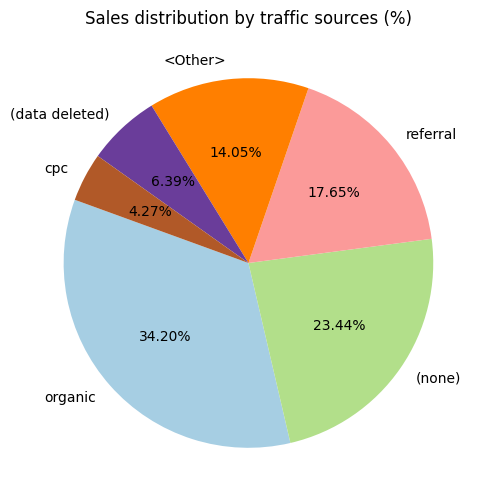

In [105]:
# Побудова кругової діаграми
plt.figure(figsize=(6, 6))
traffic_sales_per.plot(kind='pie', autopct='%1.2f%%', cmap='Paired', startangle=160)
plt.title("Sales distribution by traffic sources (%)")
plt.ylabel("")
plt.show()

З діаграми бачимо, що органічний пошук "organic" є найбільшим джерелом продажів, забезпечуючи 34.2% від загального обсягу. Прямий трафік "(none)" займає друге місце з 23.4%. Реферальний трафік "referral" також є важливим джерелом, складаючи 17.6%. Інші джерела трафіку "Other" сукупно приносять 14.0% продажів. Платна реклама "cpc" становить 6.4%, а категорія "(data deleted)" – 4.3%.

In [106]:
#  % користувачів які підтвердили елек.адресу
users_cnt = df['registered_user_id'].count()
verified_cnt = df['is_verified'].value_counts().get(1)
verified_users_per = verified_cnt/users_cnt *100
print(f"Percentage of registered users confirmed their email address: {verified_users_per}%")

Percentage of registered users confirmed their email address: 71.69797817140812%


In [107]:
# % користувачів, які відписалися від розсилки
unsubscribed_user_cnt = df['is_unsubscribed'].value_counts().get(1)
unsubscribed_user_cnt = unsubscribed_user_cnt/users_cnt *100
print(f"Percentage of registered users unsubscribed from the newsletter: {unsubscribed_user_cnt}%")

Percentage of registered users unsubscribed from the newsletter: 16.94399713723385%


In [108]:
# зареєстровані користувачі по країнах
registered_users_by_country = df.groupby('country')['registered_user_id'].count().sort_values(ascending=False).head(10)
print("\nTop 10 countries by number of registered users:")
print(registered_users_by_country)


Top 10 countries by number of registered users:
country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Spain               536
Taiwan              500
China               490
Germany             490
Italy               386
Name: registered_user_id, dtype: Int64


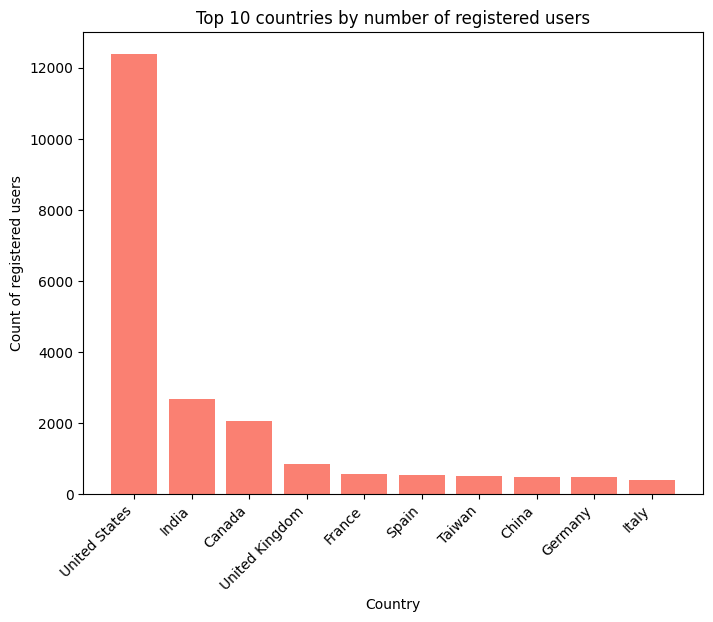

In [109]:
plt.figure(figsize=(8, 6))
plt.bar(registered_users_by_country.index, registered_users_by_country.values, color = 'salmon')
plt.xlabel("Country")
plt.ylabel("Count of registered users")
plt.title("Top 10 countries by number of registered users")
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
# відсоток зареєстрованих користувачів для кожного браузера
registered_users_by_browser = df.groupby('browser')['registered_user_id'].count().sort_values(ascending=False)
registered_users_by_browser_per = registered_users_by_browser/users_cnt *100
print(registered_users_by_browser_per)

browser
Chrome             68.302022
Safari             23.599928
<Other>             2.612274
Edge                2.408302
Firefox             1.753444
Android Webview     1.324029
Name: registered_user_id, dtype: Float64


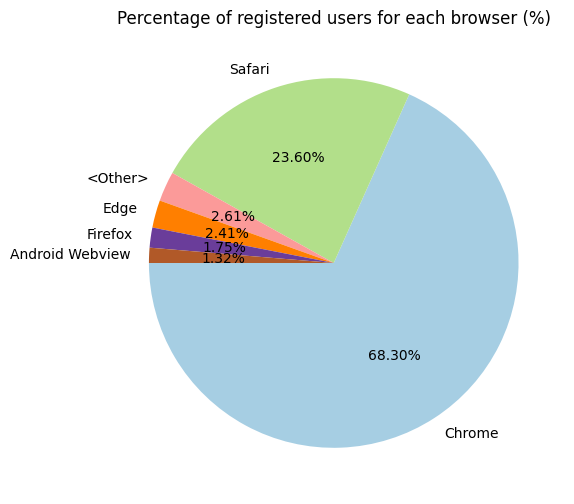

In [111]:
plt.figure(figsize=(6, 6))
registered_users_by_browser_per.plot(kind='pie', autopct='%1.2f%%', cmap='Paired', startangle=180)
plt.title("Percentage of registered users for each browser (%)")
plt.ylabel("")
plt.show()

In [112]:
# знайдемо середній чек покупців
sessions_with_order = df[df['price'].notna()]['ga_session_id'].nunique()
avg_order_value = df['price'].sum() / sessions_with_order
print(f"Average check: {avg_order_value} $")

Average check: 953.2986791102632 $


In [113]:
# Загальна сума продажів по країнах
total_sales_by_country = df.groupby('country')['price'].sum()

# Кількість унікальних сесій з покупкою по країнах
sessions_with_order_by_country = df[df['price'].notna()].groupby('country')['ga_session_id'].nunique()

# Обчислення середнього чека
avg_order_value_by_country = (total_sales_by_country / sessions_with_order_by_country).sort_values(ascending=False)

# Виводимо топ-10 країн за середнім чеком
print("Average check by country (Top 5):")
print(avg_order_value_by_country.head(5))


Average check by country (Top 5):
country
Palestine    1747.692308
Bulgaria     1518.111111
Albania      1401.500000
Venezuela    1396.769231
Kenya        1373.478261
dtype: float64


In [114]:
total_sales_by_country.sort_values(ascending=False).head(5)

,price
country,
United States,13943553.9
India,2809762.0
Canada,2437921.0
United Kingdom,938317.9
France,710692.8


<ipython-input-115-e4e9144cb541>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value_by_country.head(5).values,
<ipython-input-115-e4e9144cb541>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_country.sort_values(ascending=False).head(5).values,


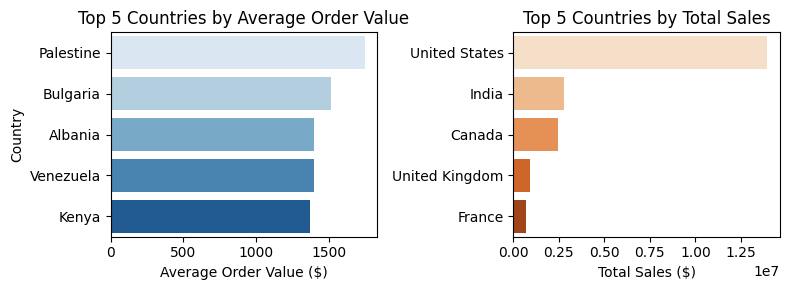

In [115]:

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# діаграма середнього чека по країнах (Топ-5)
sns.barplot(x=avg_order_value_by_country.head(5).values,
            y=avg_order_value_by_country.head(5).index,
            palette="Blues", ax=axes[0])
axes[0].set_title("Top 5 Countries by Average Order Value")
axes[0].set_xlabel("Average Order Value ($)")
axes[0].set_ylabel("Country")

# діаграма загального обсягу продажів по країнах (Топ-5)
sns.barplot(x=total_sales_by_country.sort_values(ascending=False).head(5).values,
            y=total_sales_by_country.sort_values(ascending=False).head(5).index,
            palette="Oranges", ax=axes[1])
axes[1].set_title("Top 5 Countries by Total Sales")
axes[1].set_xlabel("Total Sales ($)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


Аналіз показав, що країни з найвищим середнім чеком не завжди збігаються з країнами, де оформлюють найбільше замовлень. Це означає, що в деяких країнах клієнти роблять менше покупок, але витрачають більше за один раз, тоді як в інших країнах частота замовлень вища, але середній чек нижчий. Це допоможе нам  визначити ключові ринки, тобто  де  варто стимулювати частоту покупок, а де – збільшувати середній чек. Також можна подумати де вигідно адаптувати маркетингову стратегію, а де оптимізовувати рекламний бюджет.

## Аналіз динаміки продажів:


In [116]:
# продажі по даті
sales_by_date = (df.groupby('order_date')['price'].sum())
print(sales_by_date)

order_date
2020-11-01    244292.5
2020-11-02    355506.8
2020-11-03    498979.6
2020-11-04    339187.1
2020-11-05    391276.6
                ...   
2021-01-27    286340.7
2021-01-28         0.0
2021-01-29         0.0
2021-01-30         0.0
2021-01-31         0.0
Name: price, Length: 92, dtype: float64


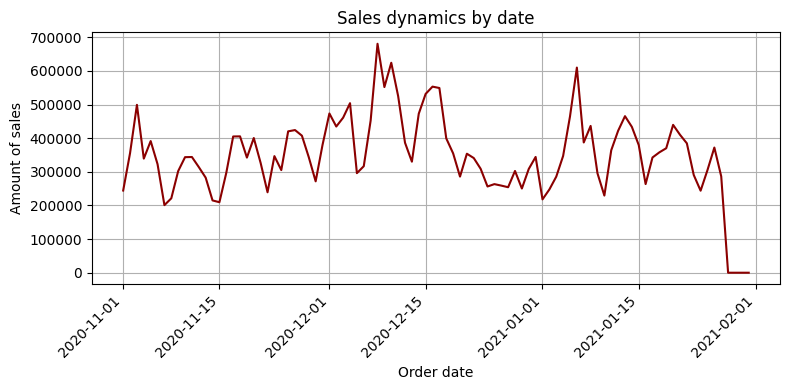

In [117]:
plt.figure(figsize=(8, 4))
plt.plot(sales_by_date.index, sales_by_date.values, label='Sales', color = "darkred")
plt.title('Sales dynamics by date')
plt.xlabel('Order date')
plt.ylabel('Amount of sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [118]:
print(df['continent'].unique())

['Americas' 'Europe' 'Africa' 'Asia' 'Oceania' '(not set)']


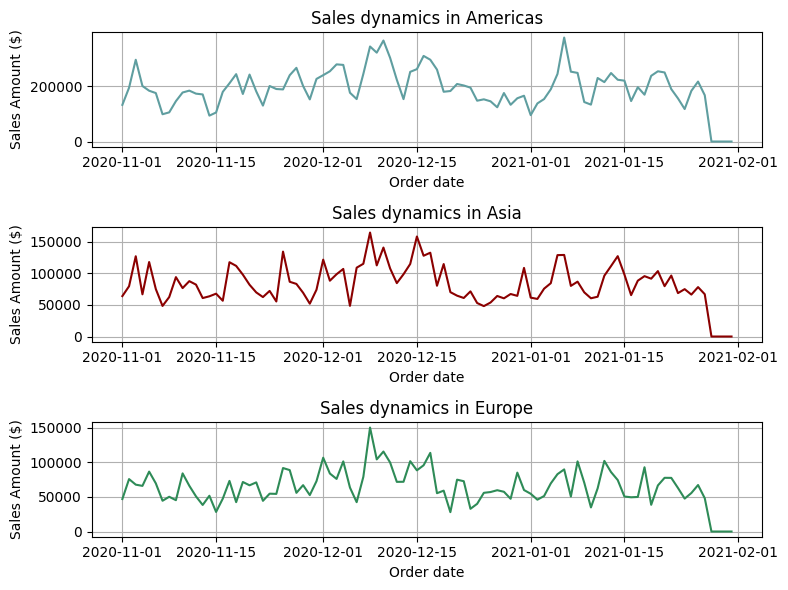

In [119]:
# динаміка продажів в Америці, Азії та Європі
df_filtered = df[df['continent'].isin(["Americas", "Asia", "Europe"])]


sales_by_continent = df_filtered.groupby(['order_date', 'continent'])['price'].sum().reset_index()
fig, axs = plt.subplots(3, 1, figsize=(8, 6))  # Створюємо 3 графіки, по одному для кожного континенту

sales_americas = sales_by_continent[sales_by_continent['continent'] == "Americas"]# Графік для Америки
sns.lineplot(data=sales_americas, x='order_date', y='price', ax=axs[0], color="cadetblue")
axs[0].set_title("Sales dynamics in Americas")
axs[0].set_xlabel("Order date")
axs[0].set_ylabel("Sales Amount ($)")
axs[0].grid(True)

sales_asia = sales_by_continent[sales_by_continent['continent'] == "Asia"]# Графік для Азії
sns.lineplot(data=sales_asia, x='order_date', y='price', ax=axs[1], color="darkred")
axs[1].set_title("Sales dynamics in Asia")
axs[1].set_xlabel("Order date")
axs[1].set_ylabel("Sales Amount ($)")
axs[1].grid(True)

sales_europe = sales_by_continent[sales_by_continent['continent'] == "Europe"]# Графік для Європи
sns.lineplot(data=sales_europe, x='order_date', y='price', ax=axs[2], color="seagreen")
axs[2].set_title("Sales dynamics in Europe")
axs[2].set_xlabel("Order date")
axs[2].set_ylabel("Sales Amount ($)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

На графіку зображено динаміку продажів у Америці, Азії та Європі протягом періоду з листопада 2020 року по лютий 2021 року. У Америці спостерігається відносно стабільний рівень продажів з періодичними коливаннями в межах 150 000 - 200 000 доларів до кінця січня. Азія - продажі демонструють незначні  коливання в діапазоні 50 000 - 150 000 доларів. І Європа  - продажі показують значні коливання, від майже нуля до 150 000 доларів. У всіх трьох регіонах спостерігається різке падіння продажів на початку лютого, що може свідчити про спільний фактор, який вплинув на всі ринки.
Америка демонструє відносно стабільні продажі порівняно з Азією та Європою.

In [120]:
print(df['channel'].unique())

['Paid Search' 'Organic Search' 'Direct' 'Undefined' 'Social Search']


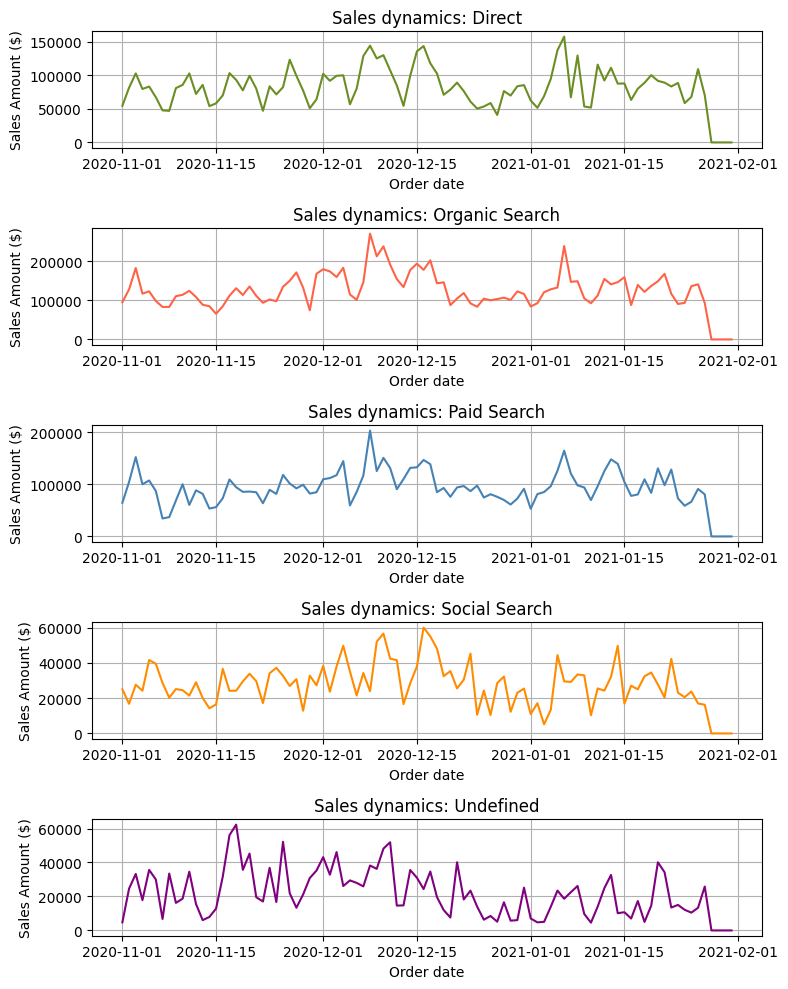

In [121]:
# динаміка продажів у розрізі каналів трафіку
sales_by_channel = df.groupby(['order_date', 'channel'])['price'].sum().reset_index()
channels = sales_by_channel['channel'].unique()
num_channels = len(channels)
fig, axs = plt.subplots(num_channels, 1, figsize=(8, 10))
colors = {
    "Paid Search": "steelblue",
    "Organic Search": "tomato",
    "Direct": "olivedrab",
    "Undefined": "purple",
    "Social Search": "darkorange"}
# Створюємо окремі графіки для кожного каналу
for i, channel in enumerate(channels):
    channel_data = sales_by_channel[sales_by_channel['channel'] == channel]
    sns.lineplot(data=channel_data, x='order_date', y='price', ax=axs[i], color=colors.get(channel, 'black'))
    axs[i].set_title(f"Sales dynamics: {channel}")
    axs[i].set_xlabel("Order date")
    axs[i].set_ylabel("Sales Amount ($)")
    axs[i].grid(True)
plt.tight_layout()
plt.show()

Усі канали трафіку (Direct, Organic Search, Paid Search, Social Search, Undefined) демонструють різке падіння продажів до нуля на початку лютого, що свідчить про спільний фактор, який вплинув на всі канали.
Organic Search та Paid Search показують найбільший обсяг продажів, Direct показує відносно стабільні продажі до лютого, канал Undefined є найменш стабільним, з дуже великими коливаннями і Social Search та Undefined демонструють менший обсяг продажів.

In [122]:
print(df['device'].unique())

['desktop' 'mobile' 'tablet']


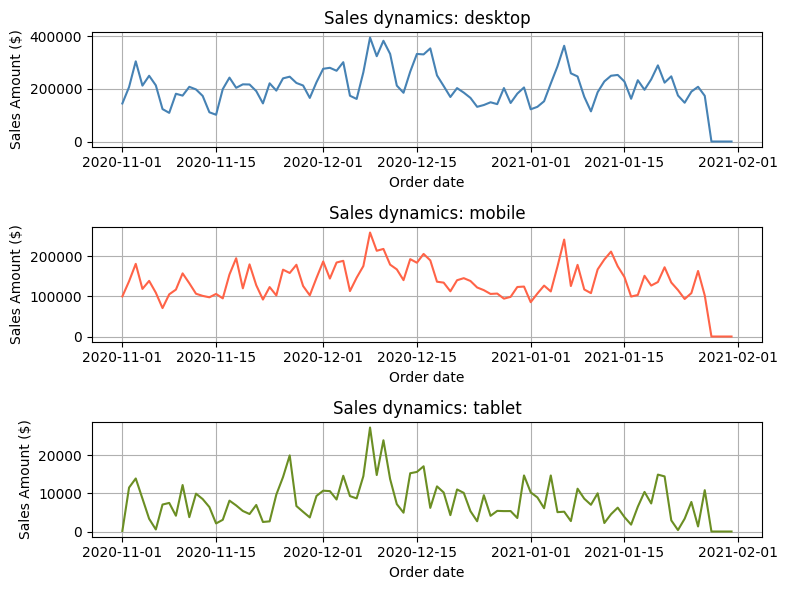

In [123]:
# динаміка продажів у розрізі девайсів
sales_by_device= df.groupby(['order_date', 'device'])['price'].sum().reset_index()
devices = sales_by_device['device'].unique()
num_device = len(devices)
fig, axs = plt.subplots(num_device, 1, figsize=(8, 6))
colors = {
    "desktop": "steelblue",
    "mobile": "tomato",
    "tablet": "olivedrab"}
# створюємо окремі графіки для девайсів
for i, device in enumerate(devices):
    device_data = sales_by_device[sales_by_device['device'] == device]
    sns.lineplot(data=device_data, x='order_date', y='price', ax=axs[i], color=colors.get(device, 'black'))
    axs[i].set_title(f"Sales dynamics: {device}")
    axs[i].set_xlabel("Order date")
    axs[i].set_ylabel("Sales Amount ($)")
    axs[i].grid(True)
plt.tight_layout()
plt.show()

Графіки демонструють динаміку продажів за трьома типами пристроїв: desktop, mobile та tablet. Усі три графіки показують різке падіння продажів на початку лютого 2021 року, що вказує на спільний фактор, який вплинув на продажі з усіх пристроїв. Desktop та mobile показують значно більші обсяги продажів порівняно з tablet, що свідчить про їх більшу популярність серед користувачів.

## Зведені таблиці

In [124]:
# кількість сесій у розрізі каналів трафіку та типів девайсів
pivot_table_sessions = pd.pivot_table(df, values="ga_session_id", index="device",columns="channel", aggfunc="count",dropna=True)
print(pivot_table_sessions)


channel  Direct  Organic Search  Paid Search  Social Search  Undefined
device                                                                
desktop   47825           72622        55167          16288      12527
mobile    31745           49014        37034          10988       8486
tablet     1812            2789         2140            638        470


In [125]:
# загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)
pivot_tablet_category_country = pd.pivot_table(df, index='category', columns='country', values='price', aggfunc='sum', fill_value=0)
top_10_categories = pivot_tablet_category_country.sum(axis=1).nlargest(10).index
top_5_countries = pivot_tablet_category_country.sum(axis=0).nlargest(5).index
pivot_table_filtered = pivot_tablet_category_country.loc[top_10_categories, top_5_countries] # фільтруємо зведену таблицю
print(pivot_table_filtered)

country                           United States     India    Canada  \
category                                                              
Sofas & armchairs                     3707144.5  788430.0  692427.5   
Chairs                                2619773.8  544309.2  417740.8   
Beds                                  2213058.0  358319.5  354772.0   
Bookcases & shelving units            1567606.9  364507.4  278981.9   
Cabinets & cupboards                   994545.5  191888.0  181802.0   
Outdoor furniture                      929245.2  162289.4  185322.8   
Tables & desks                         777865.0  186157.5  132678.0   
Chests of drawers & drawer units       382388.0   73111.0   71952.0   
Bar furniture                          330805.0   57657.0   51724.0   
Children's furniture                   207575.0   39177.0   30264.0   

country                           United Kingdom    France  
category                                                    
Sofas & armchairs        

In [126]:
# кількість сесій у розрізі операційних систем, які використовують користувачі
pivot_table_op_sys = pd.pivot_table(df, values="ga_session_id", index="operating_system", aggfunc="count",dropna=True)
print(pivot_table_op_sys)

                  ga_session_id
operating_system               
<Other>                    8673
Android                   29808
Macintosh                 26116
Web                      203909
Windows                   40937
iOS                       40102


<ipython-input-127-71801abe1034>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_table_op_sys.index, y=pivot_table_op_sys["ga_session_id"], palette="magma")


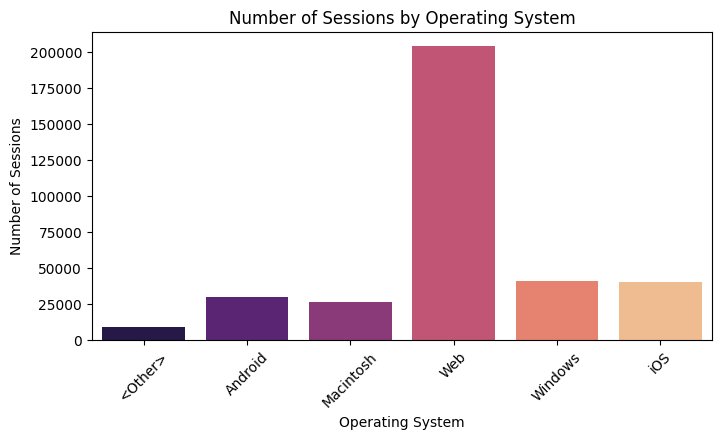

In [127]:
plt.figure(figsize=(8, 4))
sns.barplot(x=pivot_table_op_sys.index, y=pivot_table_op_sys["ga_session_id"], palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Operating System")
plt.ylabel("Number of Sessions")
plt.title("Number of Sessions by Operating System")
plt.show()

In [128]:
# сума продажів у розрізі каналів трафіку та типів девайсів, для того щоб побачити який канал ефективніший для мобільних чи десктопних покупок?
pivot_table_device_channel = pd.pivot_table(df, index='device', columns='channel', values='price',aggfunc='sum', fill_value=0)
print(pivot_table_device_channel)

channel     Direct  Organic Search  Paid Search  Social Search  Undefined
device                                                                   
desktop  4472609.4       6794107.8    4976977.8      1447384.8  1172959.2
mobile   2875317.9       4408875.1    3330032.6      1006707.3   763292.9
tablet    146996.1        230168.7     204039.0        78013.6    64248.9


Для десктопу найбільш ефективні Organic Search, Paid Search та Direct.
Для мобільних пристроїв також домінує Organic Search, але Paid Search грає ще більшу роль. Загалом десктопні покупки значно вищі, що може вказувати на більшу середню вартість замовлення або те, що складніші покупки люди частіше здійснюють із комп’ютерів. Мобільні пристрої генерують менше доходу, але Paid Search працює на них ефективніше, тому варто більше інвестувати у рекламу для мобільних.

## Статистичний аналіз взаємозв’язків:

Shapiro-Wilk p-value (sessions): 0.026201156314308208
Shapiro-Wilk p-value (sales): 0.0017206798751357067


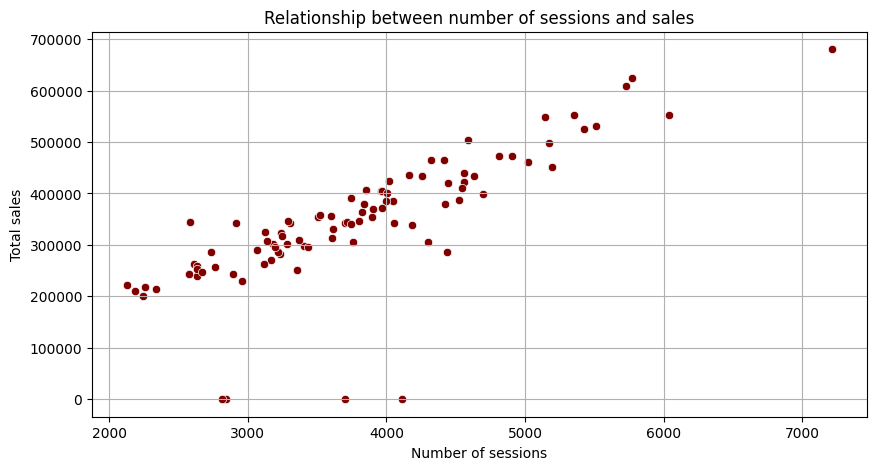

In [129]:
#  1 розрахунок кількості сесій та загальних продажів за кожну дату
session_by_date = df.groupby(['order_date'])['ga_session_id'].count().reset_index()
sales_by_date = df.groupby(['order_date'])['price'].sum().reset_index()

# об'єднання по даті замовлення
data = pd.merge(session_by_date, sales_by_date, on="order_date")

# перевіримо нормальності розподілу
from scipy.stats import shapiro

shapiro_sessions = shapiro(data['ga_session_id'])
shapiro_sales = shapiro(data['price'])
print(f"Shapiro-Wilk p-value (sessions): {shapiro_sessions.pvalue}")
print(f"Shapiro-Wilk p-value (sales): {shapiro_sales.pvalue}")

# візуалізація
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['ga_session_id'], y=data['price'], color = "maroon")
plt.xlabel("Number of sessions")
plt.ylabel("Total sales")
plt.title("Relationship between number of sessions and sales")
plt.grid()
plt.show()

Результати тесту Шапіро-Вілка
ga_session_id: p_value = 0.129 > 0.05 - розподіл нормальний;
price: p_value = 0.026 < 0.05 - розподіл відрізняється від нормальний

Оскільки одна з величин не має нормального розподілу,застосуємо для розрахунку кореляцію Спірмена.

In [130]:
from scipy.stats import spearmanr

print(f"Test statistic and p-value:{spearmanr (data['ga_session_id'], data['price'])}")
spearman_corr = data['ga_session_id'].corr(data['price'], method = "spearman")
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value:SignificanceResult(statistic=np.float64(0.8653062174563682), pvalue=np.float64(9.755923586156614e-29))
Spearman Correlation: 0.8653062174563682


P-value=9.755923586156614e-29 < 0.05 - кореляція між кількістю сесій і сумою замовлення за кожну дату є статистично значущою.

In [131]:
# 2  чи корелють продажі між собою на різних континентах
# топ 3 континента за сумою продажів
sales_by_continent = df.groupby(['order_date', 'continent'])['price'].sum().unstack()
top_3_continents = sales_by_continent.sum().nlargest(3).index
sales_top_3 = sales_by_continent[top_3_continents]
print(sales_top_3)

continent   Americas      Asia   Europe
order_date                             
2020-11-01  132002.5   63823.0  46908.0
2020-11-02  193861.0   79370.0  75710.8
2020-11-03  294529.8  126737.8  67692.0
2020-11-04  200009.5   66602.0  65915.0
2020-11-05  182988.2  117608.4  86540.0
...              ...       ...      ...
2021-01-27  166735.5   66783.1  48156.1
2021-01-28       0.0       0.0      0.0
2021-01-29       0.0       0.0      0.0
2021-01-30       0.0       0.0      0.0
2021-01-31       0.0       0.0      0.0

[92 rows x 3 columns]


In [132]:
# Перевірка нормальності розподілу для кожного континенту
for continent in top_3_continents:
    stat, p_value = shapiro(sales_top_3[continent].dropna())
    print(f"Shapiro-Wilk p-value ({continent}): {p_value}")

Shapiro-Wilk p-value (Americas): 0.01954332601296497
Shapiro-Wilk p-value (Asia): 0.0036310321229958407
Shapiro-Wilk p-value (Europe): 0.035864188219443725


p-value (Americas): 0.0195 < 0.05
p-value (Asia): 0.0036 < 0.05
p-value (Europe): 0.0358 < 0.05 дані не мають нормального розподілу, тому використовуємо кореляцію Спірмена.

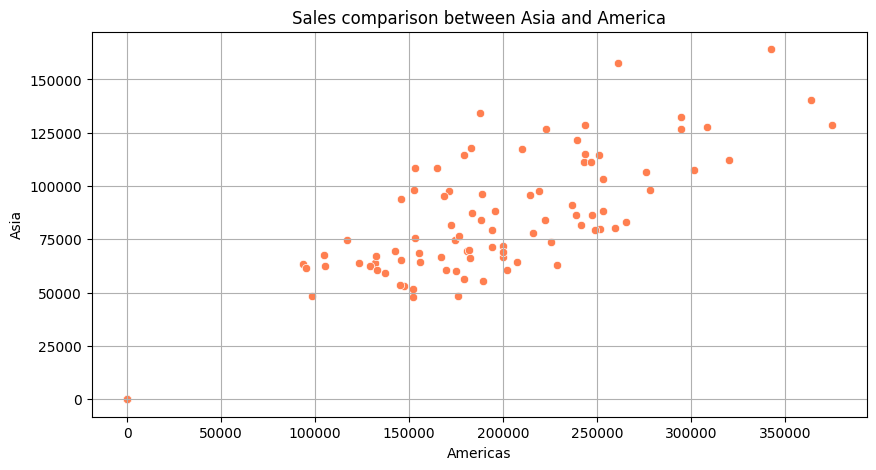

In [133]:
# візуалізація Америка/Азія
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_top_3['Americas'], y=sales_top_3['Asia'], color = "coral")
plt.xlabel("Americas")
plt.ylabel("Asia")
plt.title("Sales comparison between Asia and America")
plt.grid()
plt.show()

In [134]:
print(f"Test statistic and p-value:{spearmanr (sales_top_3['Americas'],sales_top_3['Asia'])}")
spearman_corr = sales_top_3['Americas'].corr(sales_top_3['Asia'], method = "spearman")
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value:SignificanceResult(statistic=np.float64(0.7099016615801969), pvalue=np.float64(2.3233796296203977e-15))
Spearman Correlation: 0.7099016615801969


Коефіцієнт кореляції Спірмена між продажами країн Америки та Азії становить 0.71, що вказує на сильний позитивний взаємозв’язок між ними,тобто якщо зростають продажів на одному континенті, як правило, супроводжується зростанням на іншому.
P-значення (2.32e-15) є надзвичайно малим (менше 0.05), що підтверджує статистичну значущість кореляції.

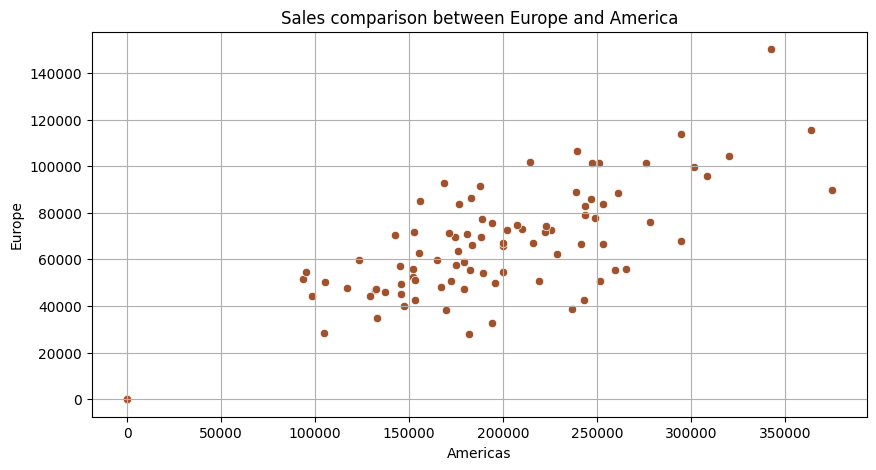

In [135]:
# візуалізація Америка/Європа
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_top_3['Americas'], y=sales_top_3['Europe'], color = "sienna")
plt.xlabel("Americas")
plt.ylabel("Europe")
plt.title("Sales comparison between Europe and America")
plt.grid()
plt.show()

In [136]:
print(f"Test statistic and p-value:{spearmanr (sales_top_3['Americas'],sales_top_3['Europe'])}")
spearman_corr = sales_top_3['Americas'].corr(sales_top_3['Europe'], method = "spearman")
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value:SignificanceResult(statistic=np.float64(0.6725700545639509), pvalue=np.float64(2.1035588726455927e-13))
Spearman Correlation: 0.6725700545639509


Проаналізувавши  продажі країн Америки та Європи, маємо також сильну позитивниу кореляцію між двома змінними, коеф.Спірмена = 0.67.
P-значення = 2.10e-13 < 0.05, що означає, що кореляція статистично значуща.

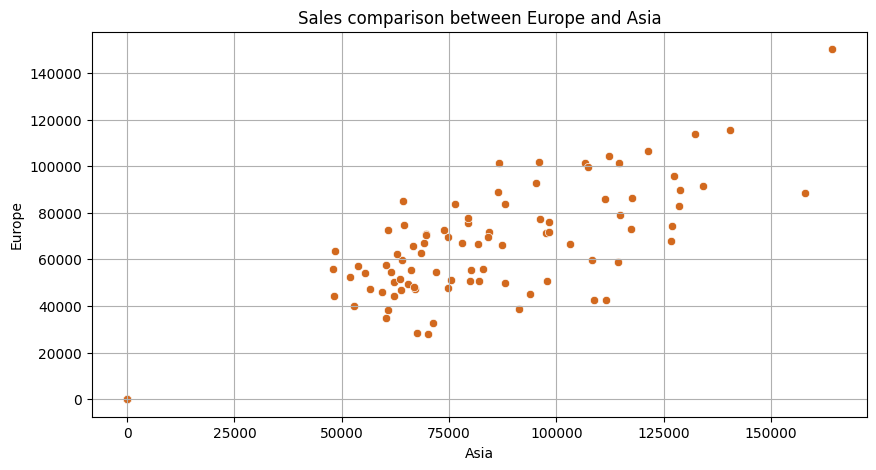

In [137]:
# візуалізація Азія/Європа
plt.figure(figsize=(10, 5))
sns.scatterplot(x=sales_top_3['Asia'], y=sales_top_3['Europe'], color = "chocolate")
plt.xlabel("Asia")
plt.ylabel("Europe")
plt.title("Sales comparison between Europe and Asia")
plt.grid()
plt.show()

In [138]:
print(f"Test statistic and p-value:{spearmanr (sales_top_3['Asia'],sales_top_3['Europe'])}")
spearman_corr = sales_top_3['Asia'].corr(sales_top_3['Europe'], method = "spearman")
print(f"Spearman Correlation: {spearman_corr}")

Test statistic and p-value:SignificanceResult(statistic=np.float64(0.6571102685039614), pvalue=np.float64(1.1290947217450973e-12))
Spearman Correlation: 0.6571102685039614


З результату також маємо, що продажі в Азії та Європі значною мірою взаємопов’язані коеф.Спірмена = 0,65 і цей зв’язок є статистично підтвердженим p-value < 0.05.

In [139]:
# 3 Чи корелюють між собою продажі за різними каналами трафіку
# групуємо дані за датою та каналом трафіку
sales_by_channel = df.groupby(['order_date', 'channel'])['price'].sum().unstack()

In [140]:
# перевірка нормальності розподілу для кожного каналу
shapiro_results = {channel: shapiro(sales_by_channel[channel].dropna()) for channel in sales_by_channel.columns}
for channel, (stat, p_value) in shapiro_results.items():
    print(f"Shapiro-Wilk Test for {channel}: statistic={stat}, p-value={p_value}")

Shapiro-Wilk Test for Direct: statistic=0.96504833852411, p-value=0.014370137066170845
Shapiro-Wilk Test for Organic Search: statistic=0.9479277681842824, p-value=0.001079749052624874
Shapiro-Wilk Test for Paid Search: statistic=0.9598794461305209, p-value=0.006358557539484998
Shapiro-Wilk Test for Social Search: statistic=0.9842497648846739, p-value=0.334749389247742
Shapiro-Wilk Test for Undefined: statistic=0.9579319267636441, p-value=0.0047121709418936905



Spearman Correlation Matrix:
channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.779663     0.729369       0.469342   
Organic Search  0.779663        1.000000     0.793381       0.461543   
Paid Search     0.729369        0.793381     1.000000       0.492725   
Social Search   0.469342        0.461543     0.492725       1.000000   
Undefined       0.556922        0.524677     0.556491       0.462530   

channel         Undefined  
channel                    
Direct           0.556922  
Organic Search   0.524677  
Paid Search      0.556491  
Social Search    0.462530  
Undefined        1.000000  


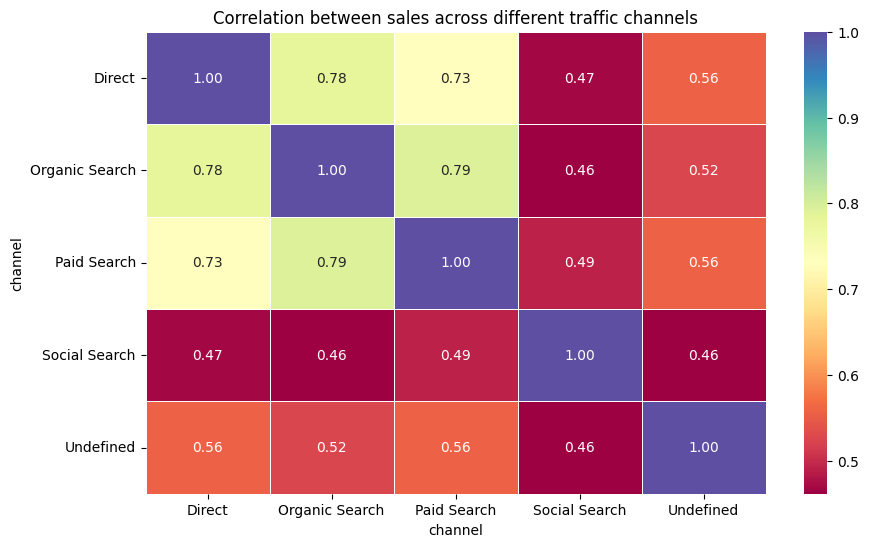

In [141]:
# обчислення кореляції Спірмена для кожної пари каналів, дані не відповідають нормальному розподілу
corr_matrix = sales_by_channel.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)
plt.title("Correlation between sales across different traffic channels")
plt.show()

Теплова карта відображає кореляцію між обсягами продажів, отриманими з різних каналів трафіку. Канали "Direct", "Organic Search" та "Paid Search" демонструють сильну позитивну кореляцію між собою (кореляція близько 0.73-0.79), що означає, що зміни в обсягах продажів з одного з цих каналів, ймовірно, супроводжуються аналогічними змінами в інших.
Канал "Social Search" показує слабшу кореляцію з іншими каналами (кореляція близько 0.46-0.49), це свідчить про те, що продажі з соціальних мереж менш залежать від інших каналів трафіку.
Канал "Undefined" показує середні показники кореляції з усіма іншими каналами.
Усі кореляції між парами каналів трафіку є статистично значимими, оскільки їх p-value значно менші за 0.05, це означає, що виявлені кореляції не є випадковими і відображають реальну взаємодію між каналами.

In [142]:
# 4 Чи корелюють між собою продажі за топ-5 категоріями товарів?

# топ 5 категорій
sales_by_category = df.groupby(['order_date', 'category'])['price'].sum().unstack()
top_5_category = sales_by_category.sum().nlargest(5).index
sales_top_5 = sales_by_category[top_5_category]
print(sales_top_5)

category    Sofas & armchairs   Chairs     Beds  Bookcases & shelving units  \
order_date                                                                    
2020-11-01            75216.0  46006.0  14041.0                     36701.0   
2020-11-02            79977.5  58834.0  79683.5                     40979.0   
2020-11-03           175594.0  61204.0  66219.5                     64360.1   
2020-11-04            86861.5  44113.0  48939.0                     35719.8   
2020-11-05           137288.0  90388.4  23449.0                     40998.8   
...                       ...      ...      ...                         ...   
2021-01-23            76898.0  57493.0  37116.0                     29862.7   
2021-01-24            57837.0  54288.0  23294.0                     25396.0   
2021-01-25            84544.0  51424.2  47303.5                     25919.6   
2021-01-26            85431.0  96216.2  69894.5                     39119.2   
2021-01-27            51354.0  48153.0  43080.0     

In [143]:
shapiro_results = {category: shapiro(sales_by_category[category].dropna()) for category in sales_by_category.columns}
for category, (stat, p_value) in shapiro_results.items():
    print(f"Shapiro-Wilk Test for {category}: statistic={stat}, p-value={p_value}")


Shapiro-Wilk Test for Bar furniture: statistic=0.9604056540427527, p-value=0.008767500645159245
Shapiro-Wilk Test for Beds: statistic=0.9502172398839275, p-value=0.001990313417105756
Shapiro-Wilk Test for Bookcases & shelving units: statistic=0.9604356648389608, p-value=0.008807256782666481
Shapiro-Wilk Test for Cabinets & cupboards: statistic=0.9561694649352347, p-value=0.004672141747344718
Shapiro-Wilk Test for Café furniture: statistic=0.8969468977603748, p-value=4.606120313021218e-06
Shapiro-Wilk Test for Chairs: statistic=0.9426548736704264, p-value=0.0007083935880594534
Shapiro-Wilk Test for Chests of drawers & drawer units: statistic=0.963807855255854, p-value=0.014725896593042088
Shapiro-Wilk Test for Children's furniture: statistic=0.9609443482107795, p-value=0.00951052654669906
Shapiro-Wilk Test for Nursery furniture: statistic=0.9751994005978454, p-value=0.08934667725311499
Shapiro-Wilk Test for Outdoor furniture: statistic=0.9525470400105054, p-value=0.0027676164041836233
S


Spearman Correlation Matrix:
category                    Sofas & armchairs    Chairs      Beds  \
category                                                            
Sofas & armchairs                    1.000000  0.583319  0.521715   
Chairs                               0.583319  1.000000  0.534941   
Beds                                 0.521715  0.534941  1.000000   
Bookcases & shelving units           0.625603  0.636751  0.542742   
Cabinets & cupboards                 0.631204  0.526822  0.440368   

category                    Bookcases & shelving units  Cabinets & cupboards  
category                                                                      
Sofas & armchairs                             0.625603              0.631204  
Chairs                                        0.636751              0.526822  
Beds                                          0.542742              0.440368  
Bookcases & shelving units                    1.000000              0.528706  
Cabinets & c

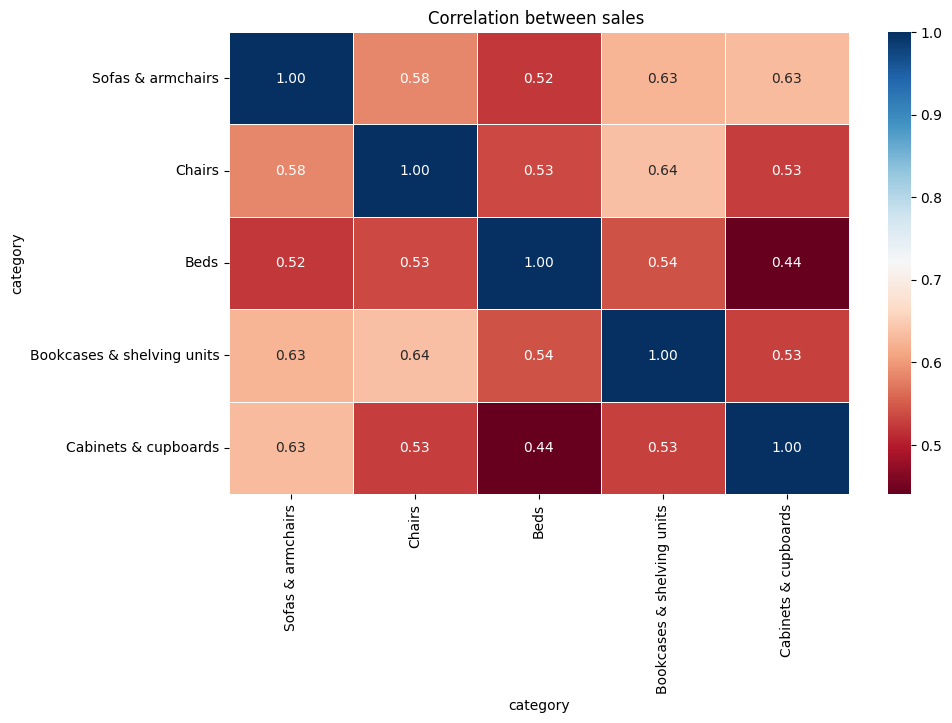

In [144]:
corr_matrix = sales_top_5.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title("Correlation between sales ")
plt.show()

In [145]:
# 8 Проаналізуй продажі за кожну дату зареєстрованих та незареєстрованих користувачів

In [146]:
# Групуємо дані за датою та статусом користувача
sales_per_day = df.groupby(['order_date', df['registered_user_id'].notna()])['price'].sum().unstack()
sales_per_day.columns = ['Unregistered Sales', 'Registered Sales']
print(sales_per_day)

            Unregistered Sales  Registered Sales
order_date                                      
2020-11-01            222745.5           21547.0
2020-11-02            310550.0           44956.8
2020-11-03            469829.1           29150.5
2020-11-04            318204.9           20982.2
2020-11-05            365942.0           25334.6
...                        ...               ...
2021-01-27            271727.1           14613.6
2021-01-28                 0.0               NaN
2021-01-29                 0.0               NaN
2021-01-30                 0.0               NaN
2021-01-31                 0.0               NaN

[92 rows x 2 columns]


In [147]:
stat, p_value = shapiro(sales_per_day['Unregistered Sales'])
print(f"Shapiro-Wilk Test for Unregistered Users: p={p_value}")# не відпоаідають нормальному розподілу

Shapiro-Wilk Test for Unregistered Users: p=0.0012184604855253293


In [148]:
sales_per_day = sales_per_day.fillna(0)# замінили NaN на 0, щоб розрахувати p-value

In [149]:
stat, p_value = shapiro(sales_per_day['Registered Sales'])
print(f"Shapiro-Wilk Test for Registered Users: p={p_value}")#  дані розподілені нормально

Shapiro-Wilk Test for Registered Users: p=0.14816728286235686


In [150]:
#Оскільки дані незареєстрованих покупців не відповідають нормальному розподілу, і вибірки є не залежними одна від одної, використаємо для розрахкнків тест Манна-Уїтні
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(sales_per_day['Registered Sales'], sales_per_day['Unregistered Sales'], alternative='two-sided')
print(f"Mann-Whitney U test result: p={p_value}")

Mann-Whitney U test result: p=8.379540669190225e-27


In [151]:
8.379540669190225e-27<0.05

True

In [152]:
sales_per_day['Registered Sales'].describe()

,Registered Sales
count,92.000000
mean,28070.853261
std,12124.817697
min,0.000000
25%,19938.250000
50%,27233.500000
75%,35478.600000
max,68151.100000


In [153]:
sales_per_day['Unregistered Sales'].describe()

,Unregistered Sales
count,92.000000
mean,319447.963043
std,113764.392969
min,0.000000
25%,263005.700000
50%,315170.750000
75%,375010.750000
max,612358.400000


Оскільки тест Манна-Уїтні показав p ≈ 8.38e-27 < 0.05 , отже  різниця між покупками зареєстрованих та незареєстрованих користувачів є статистично значущою. Однак, бачимо, що незареєстровані користувачі витрачають більше, і це може свідчити про кілька важливих факторів: реєстрація не дає користувачам цінності, сам процес реєстраціє займає багато часу чи є скдадним, можливо маємо велику частину одноразових покупців, тощо.

In [154]:
# Проаналізуй кількість сесій за різними каналами трафіку
session_by_channel = df.groupby('channel')['ga_session_id'].count().reset_index()
print(session_by_channel)

          channel  ga_session_id
0          Direct          81382
1  Organic Search         124425
2     Paid Search          94341
3   Social Search          27914
4       Undefined          21483


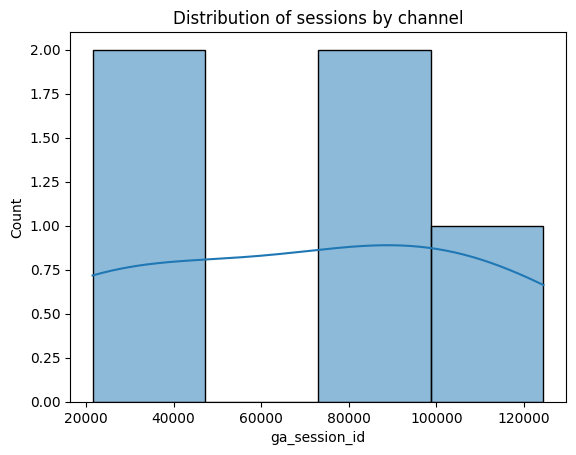

Shapiro-Wilk Test : p-value = 0.48768403790531967
Дані мають нормальний розподіл.


In [155]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(session_by_channel['ga_session_id'], kde=True)
plt.title("Distribution of sessions by channel")
plt.show()

stat, p_value = stats.shapiro(session_by_channel['ga_session_id'])
print(f"Shapiro-Wilk Test : p-value = {p_value}")

# Висновок
if p_value > 0.05:
    print("Дані мають нормальний розподіл.")
else:
    print("Дані НЕ мають нормального розподілу.")


In [156]:
from scipy.stats import chisquare

#  х-квадрат тест для перевірки відмінностей між групами (оскільки дані вже агреговані)
chi2_stat, p_value = chisquare(session_by_channel['ga_session_id'])

# Вивід результатів
print(f"Х-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Є статистично значущі відмінності між каналами трафіку.")
else:
    print("Немає статистично значущих відмінностей між каналами.")

Х-square statistic: 111705.27557253001
P-value: 0.0
Є статистично значущі відмінності між каналами трафіку.


 Канали отримують дуже різну кількість трафіку, і цей розподіл явно не є випадковим.

In [157]:
# Чи відрізняється статистично доля сесій з органічним трафіком у Європі та Америці?

# Фільтруємо органічний трафік для Європи та Америки
organic_EU = df[(df['channel'] == 'Organic Search') & (df['continent'] == 'Europe')]['ga_session_id'].count()
organic_US = df[(df['channel'] == 'Organic Search') & (df['continent'] == 'Americas')]['ga_session_id'].count()

total_EU = df[df['continent'] == 'Europe']['ga_session_id'].count()
total_US = df[df['continent'] == 'Americas']['ga_session_id'].count()

In [158]:
import statsmodels.api as sm # для порівняння часток використовуємо тест пропорцій z-test

z_stat,p_value = sm.stats.proportions_ztest([organic_EU, organic_US],[total_EU, total_US])

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Є статистично значуща різниця у долі органічного трафіку між Європою та Америкою.")
else:
    print("Немає статистично значущої різниці у долі органічного трафіку між Європою та Америкою.")

Z-statistic: 0.28951412926103953
P-value: 0.7721879690501752
Немає статистично значущої різниці у долі органічного трафіку між Європою та Америкою.


[Dashboard Tableau Public](https://public.tableau.com/views/Onlinestoresalesanalytics_17428333646870/Onlinestoresalesanalytics?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)